

## <font color = #99c9bd> **Analise Exploratória - Dados clientes Ifood**

<font color = #99c9bd> **Características Gerais do Dataset**

In [27]:
# Importando bibliotecas

import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter



In [7]:
dados = pd.read_csv("/Users/thaisfernandespereira/Documents/estat_analises/descritiva/mkt_data.csv")

In [9]:
dados.head(5)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [93]:
dados.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [11]:
dados.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,198.0,54.0,1113.0,364.0,476.0,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,1.0,2.0,3.0,4.0,5.0,562.764626,518.707483,0.29932,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.0,0.0,0.0,0.0,0.0,575.936911,553.847248,0.68044,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,1.0,2.0,3.0,4.0,5.0,56.000000,42.000000,0.00000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.00000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,884.000000,0.00000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.00000,3.000000,2491.000000


In [12]:
quantidade_duplicadas = dados.duplicated().sum()

print(f"Número de linhas duplicadas: {quantidade_duplicadas}")

Número de linhas duplicadas: 0


<font color = #99c9bd> **Entendendo Melhor o Perfil do Cliente**

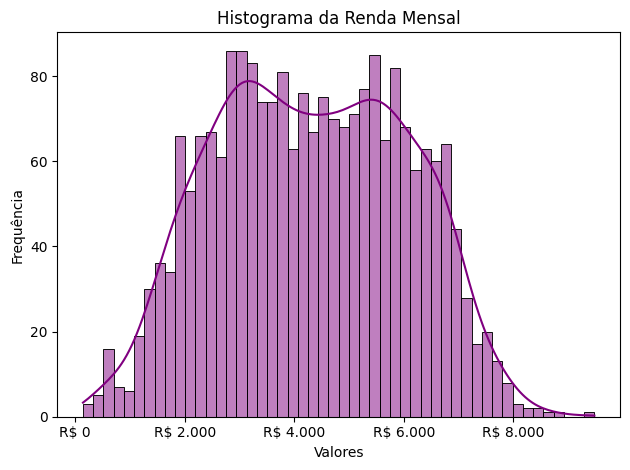

In [30]:
# Qual é a distribuicao de salarios? 

dados['renda_mensal'] = dados['Income'] / 12

# funcao para formatar em reais o dado de renda

def formatar_em_reais(x, _):
    return f'R$ {x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", ".")

# Criando o histograma com Seaborn
sn.histplot(dados['renda_mensal'], bins = 50, kde='TRUE', color= 'purple')

# usando a funcao de formatar em reais no eixo x

plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_em_reais))

plt.title('Histograma da Renda Mensal')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

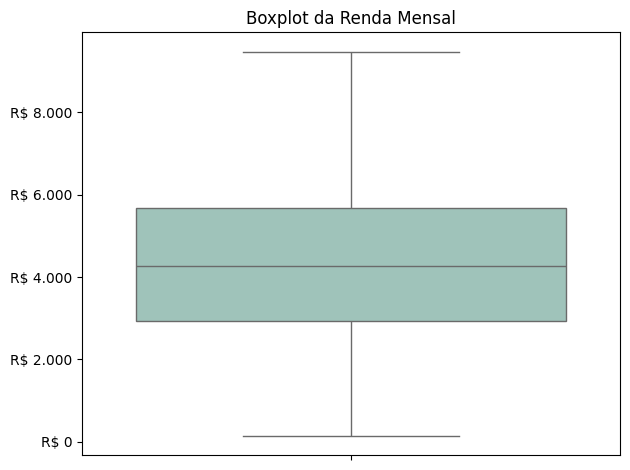

In [50]:
# boxplot da renda

sn.boxplot( y = "renda_mensal", data = dados, linewidth=1, color = '#99c9bd')
plt.ylabel('')
plt.title('Boxplot da Renda Mensal')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_em_reais))

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [52]:
# Valores distintos da coluna Graduation

dados['education_level'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [58]:
# Qual é o nivel educacional dos clientes? 

contagem = dados['education_level'].value_counts()

percentual = dados['education_level'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(2)

})

,Quantidade,Percentual (%)
education_level,,
Graduation,1113,50.48
PhD,476,21.59
Master,364,16.51
2n Cycle,198,8.98
Basic,54,2.45


In [60]:
# Qual é o estado civil dos clientes? 

contagem = dados['marital_status'].value_counts()

percentual = dados['marital_status'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(2)

})

,Quantidade,Percentual (%)
marital_status,,
Married,854,38.73
Together,568,25.76
Single,477,21.63
Divorced,230,10.43
Widow,76,3.45


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/1771179083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'marital_status', y = 'kids', data = dados, linewidth=1, palette = colors)


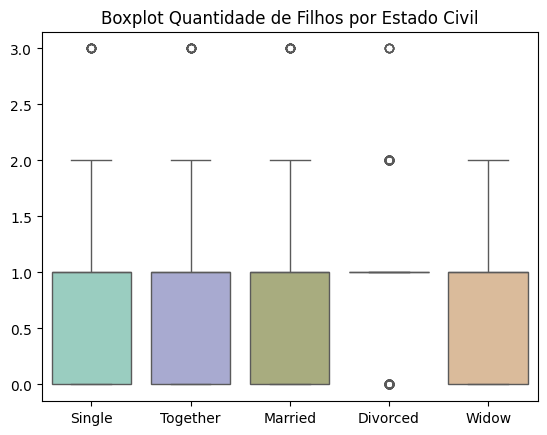

In [72]:
# Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? 

colors = "#92d5c4", "#a1a4d7",  "#AEB477", "#acbba6", "#E4BB90"

sn.boxplot(x = 'marital_status', y = 'kids', data = dados, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot Quantidade de Filhos por Estado Civil')

plt.show()

In [78]:
dados.groupby('marital_status')['kids'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
marital_status,,,
Divorced,1.01,1.0,0.74
Married,0.97,1.0,0.73
Single,0.86,1.0,0.78
Together,0.98,1.0,0.75
Widow,0.88,1.0,0.75


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/3288484017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'tem_filhos', y = 'expenses', data = dados, linewidth=1, palette = colors)


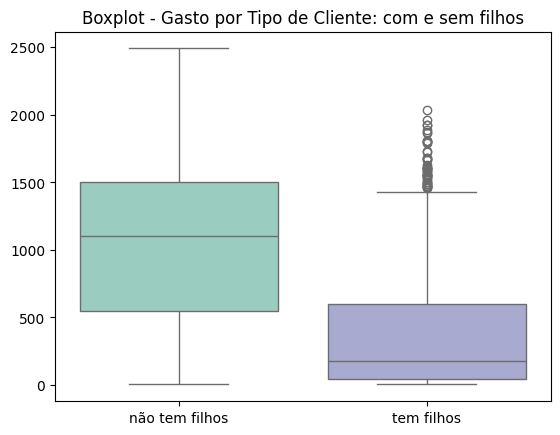

In [83]:
# As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?

dados['tem_filhos'] = np.where(dados['kids'] == 0, 'não tem filhos', 'tem filhos')

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'tem_filhos', y = 'expenses', data = dados, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: com e sem filhos')

plt.show()

/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/2575319134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'faixa_salarial', y = 'expenses', data = dados, linewidth=1, palette = colors)


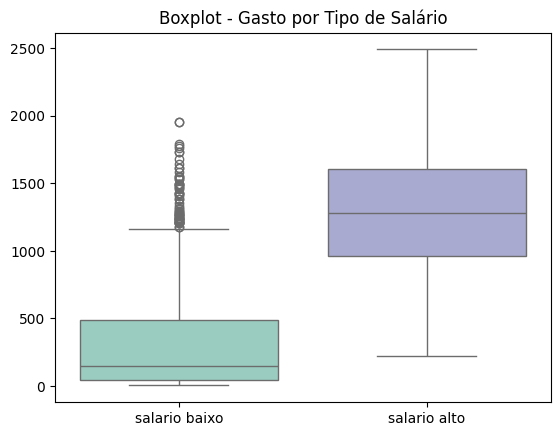

In [90]:
# Pessoas que têm um maior salário gastam mais?

q3 = dados['renda_mensal'].quantile(0.75)

dados['faixa_salarial'] = dados['renda_mensal'].apply(lambda x: 'salario alto' if x > q3 else 'salario baixo')

dados['faixa_salarial'].value_counts()

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'faixa_salarial', y = 'expenses', data = dados, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Salário')

plt.show()

In [91]:
dados.groupby('faixa_salarial')['expenses'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
faixa_salarial,,,
salario alto,1293.50,1279.0,437.41
salario baixo,319.33,144.5,375.93
